# Predicting Diabetes from Behavioral Risk Factor Surveillance System (BRFSS) 2015 using various classification methods.

## Importing required libraries

In [41]:
#Import libraries to handle data
import numpy as np
import pandas as pd
#Import libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Add statistical analysis, understanding data, 

## Importing the dataset of csv format

In [4]:
#Import required dataset from the path
data = pd.read_csv(r"C:\Users\varun.bhoj\Desktop\diabetes_binary.csv")


##   Statistical analysis

In [5]:
data.describe().T

count       mean       std   min   25%   50%   75%  \
Diabetes_binary       253680.0   0.139333  0.346294   0.0   0.0   0.0   0.0   
HighBP                253680.0   0.429001  0.494934   0.0   0.0   0.0   1.0   
HighChol              253680.0   0.424121  0.494210   0.0   0.0   0.0   1.0   
CholCheck             253680.0   0.962670  0.189571   0.0   1.0   1.0   1.0   
BMI                   253680.0  28.382364  6.608694  12.0  24.0  27.0  31.0   
Smoker                253680.0   0.443169  0.496761   0.0   0.0   0.0   1.0   
Stroke                253680.0   0.040571  0.197294   0.0   0.0   0.0   0.0   
HeartDiseaseorAttack  253680.0   0.094186  0.292087   0.0   0.0   0.0   0.0   
PhysActivity          253680.0   0.756544  0.429169   0.0   1.0   1.0   1.0   
Fruits                253680.0   0.634256  0.481639   0.0   0.0   1.0   1.0   
Veggies               253680.0   0.811420  0.391175   0.0   1.0   1.0   1.0   
HvyAlcoholConsump     253680.0   0.056197  0.230302   0.0   0.0   0.0   0.0   
AnyHealthcare         253680.0   0.951053  0.215759   0.0   1.0   1.0   1.0   
NoDocbcCost           253680.0   0.084177  0.277654   0.0   0.0   0.0   0.0   
GenHlth               253680.0   2.511392  1.068477   1.0   2.0   2.0   3.0   
MentHlth              253680.0   3.184772  7.412847   0.0   0.0   0.0   2.0   
PhysHlth              253680.0   4.242081  8.717951   0.0   0.0   0.0   3.0   
DiffWalk              253680.0   0.168224  0.374066   0.0   0.0   0.0   0.0   
Sex                   253680.0   0.440342  0.496429   0.0   0.0   0.0   1.0   
Age                   253680.0   8.032119  3.054220   1.0   6.0   8.0  10.0   
Education             253680.0   5.050434  0.985774   1.0   4.0   5.0   6.0   
Income                253680.0   6.053875  2.071148   1.0   5.0   7.0   8.0   

                       max  
Diabetes_binary        1.0  
HighBP                 1.0  
HighChol               1.0  
CholCheck              1.0  
BMI                   98.0  
Smoker                 1.0  
Stroke                 1.0  
HeartDiseaseorAttack   1.0  
PhysActivity           1.0  
Fruits                 1.0  
Veggies                1.0  
HvyAlcoholConsump      1.0  
AnyHealthcare          1.0  
NoDocbcCost            1.0  
GenHlth                5.0  
MentHlth              30.0  
PhysHlth              30.0  
DiffWalk               1.0  
Sex                    1.0  
Age                   13.0  
Education              6.0  
Income                 8.0

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_binary       253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [7]:
unique_values = {}
for col in data.columns:
    unique_values[col] = data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['Unique Values']).transpose()


Unique Values
Diabetes_binary                   2
HighBP                            2
HighChol                          2
CholCheck                         2
BMI                              84
Smoker                            2
Stroke                            2
HeartDiseaseorAttack              2
PhysActivity                      2
Fruits                            2
Veggies                           2
HvyAlcoholConsump                 2
AnyHealthcare                     2
NoDocbcCost                       2
GenHlth                           5
MentHlth                         31
PhysHlth                         31
DiffWalk                          2
Sex                               2
Age                              13
Education                         6
Income                            8

Text(0.5, 1.0, 'correlation of feature')

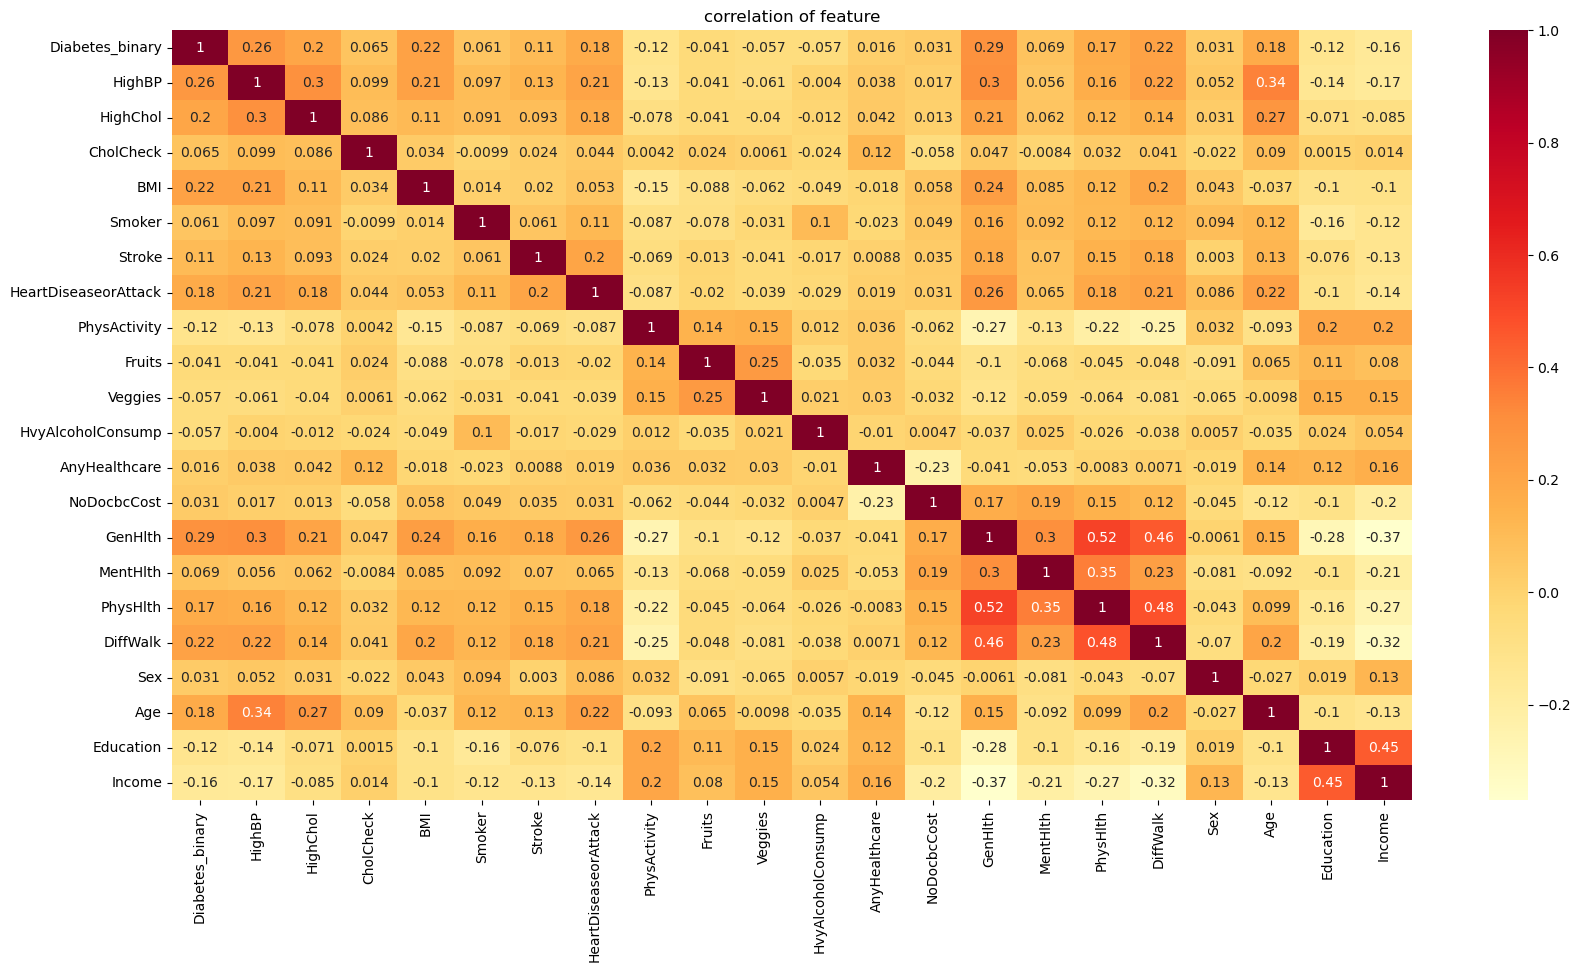

In [37]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot=True , cmap ='YlOrRd' )
plt.title("correlation of feature")

## Data Exploration and visualization

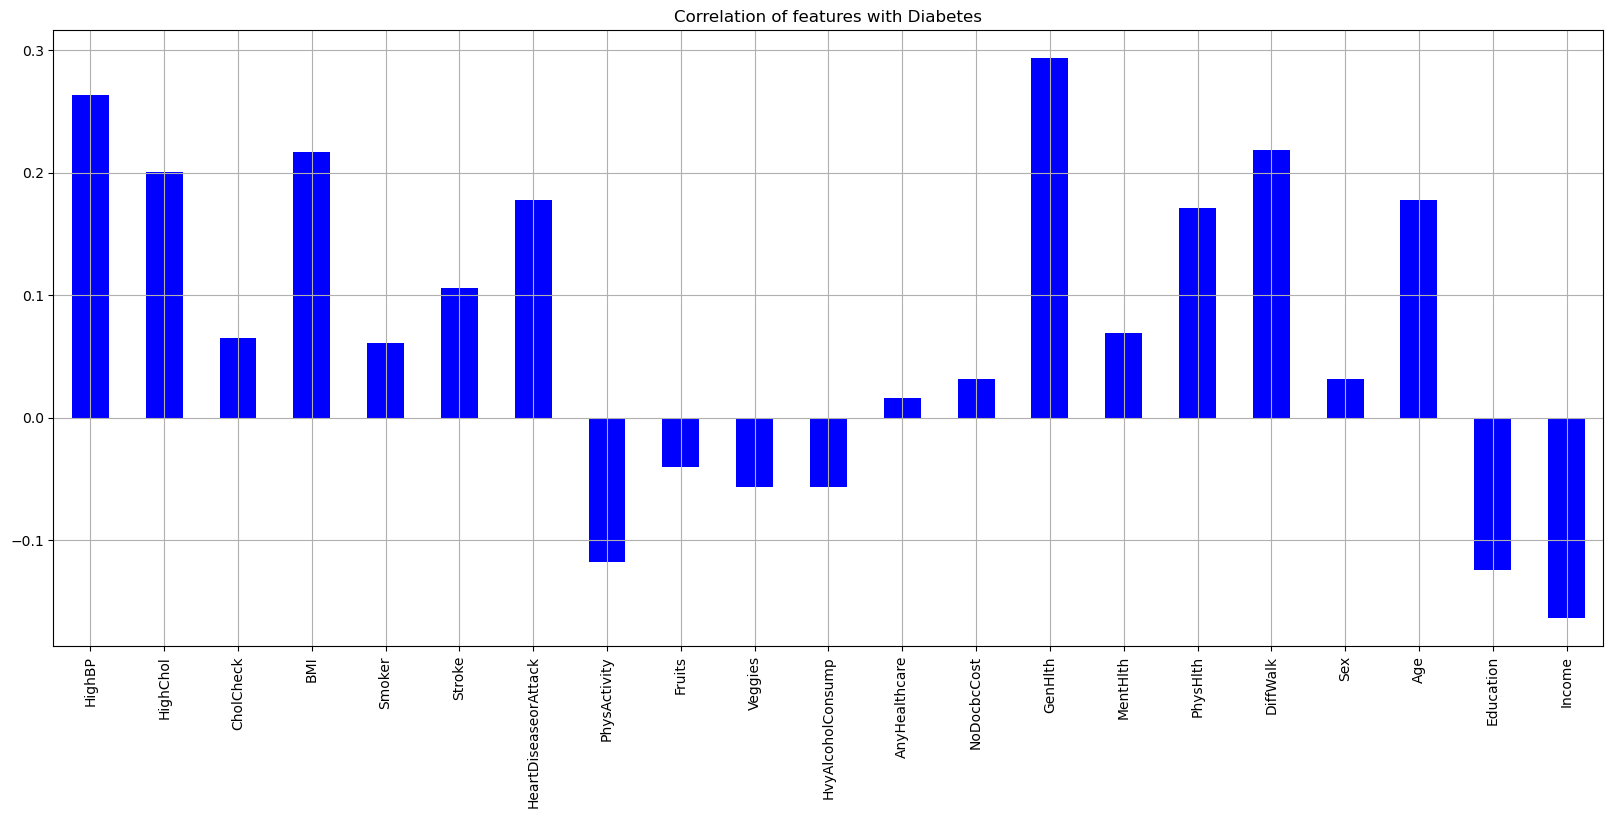

In [34]:
data.drop('Diabetes_binary', axis=1).corrwith(data.Diabetes_binary).plot(kind='bar', grid=True, figsize=(12, 5)
, title="Correlation of features with Diabetes",color="Blue");

Diabetes_binary            AxesSubplot(0.125,0.786098;0.168478x0.0939024)
HighBP                  AxesSubplot(0.327174,0.786098;0.168478x0.0939024)
HighChol                AxesSubplot(0.529348,0.786098;0.168478x0.0939024)
CholCheck               AxesSubplot(0.731522,0.786098;0.168478x0.0939024)
BMI                        AxesSubplot(0.125,0.673415;0.168478x0.0939024)
Smoker                  AxesSubplot(0.327174,0.673415;0.168478x0.0939024)
Stroke                  AxesSubplot(0.529348,0.673415;0.168478x0.0939024)
HeartDiseaseorAttack    AxesSubplot(0.731522,0.673415;0.168478x0.0939024)
PhysActivity               AxesSubplot(0.125,0.560732;0.168478x0.0939024)
Fruits                  AxesSubplot(0.327174,0.560732;0.168478x0.0939024)
Veggies                 AxesSubplot(0.529348,0.560732;0.168478x0.0939024)
HvyAlcoholConsump       AxesSubplot(0.731522,0.560732;0.168478x0.0939024)
AnyHealthcare              AxesSubplot(0.125,0.448049;0.168478x0.0939024)
NoDocbcCost             AxesSubplot(0.

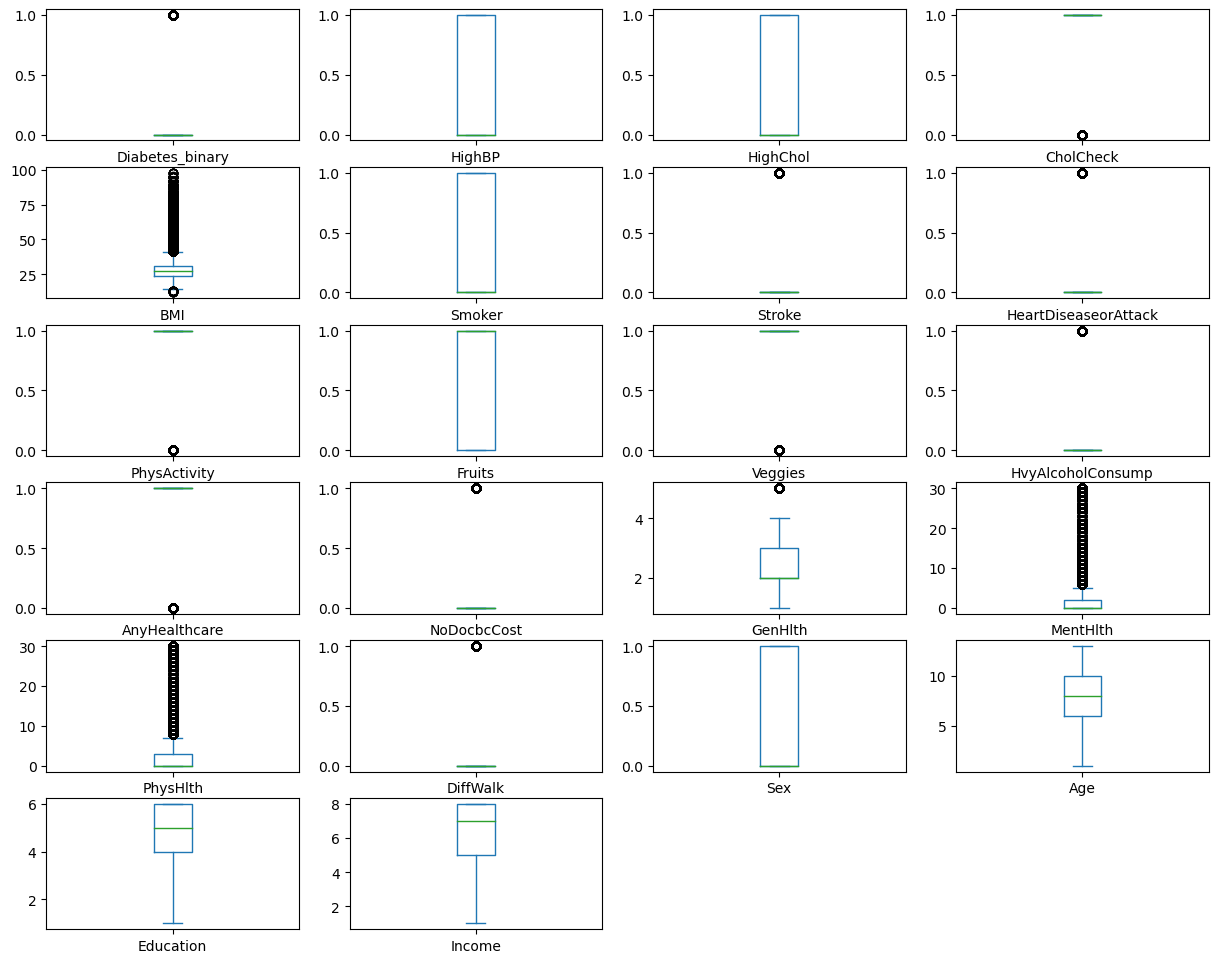

In [8]:

data.plot(kind="box", subplots=True, layout=(7,4), figsize=(15,14))


## Datavisualization Gender, Age and habitwise

In [9]:
#Making a copy of the data.

#Seprating dependent and independent features

data_cp = data.copy()

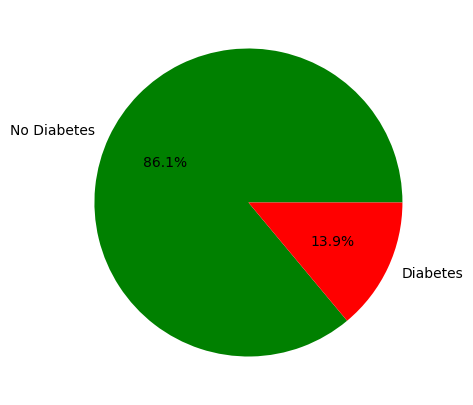

In [11]:
# pie plot of diabetes ratio 
plt.figure(figsize=(12,5))
labels = ['No Diabetes', 'Diabetes']
sizes = [data_cp['Diabetes_binary'].value_counts()[0], data_cp['Diabetes_binary'].value_counts()[1]]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, autopct='%.1f%%', colors=colors, data = data_cp);

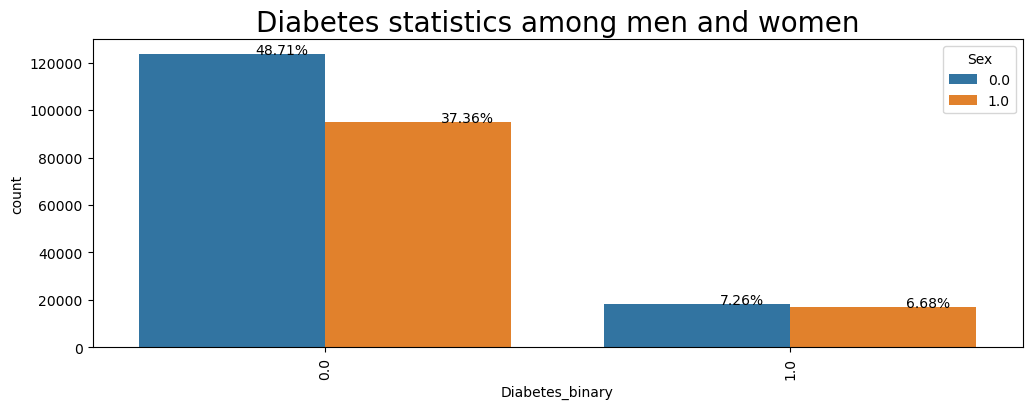

In [12]:
plt.figure(figsize=(12,4))
x= sns.countplot(x='Diabetes_binary',data=data_cp,hue='Sex')
plt.xticks(rotation=90)
plt.title('Diabetes statistics among men and women',fontdict={'fontsize':20})
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/data_cp.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

<Figure size 1200x500 with 0 Axes>

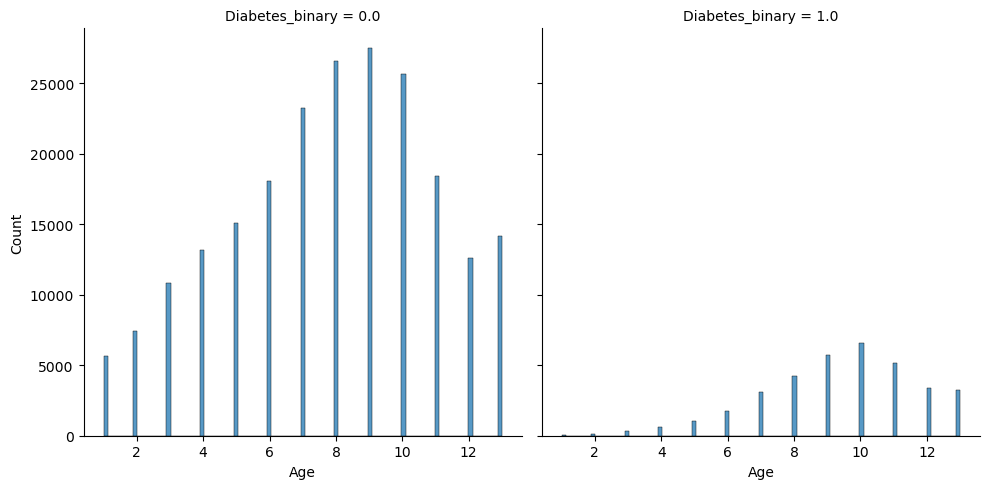

In [13]:
plt.figure(figsize=(12,5))
sns.displot(x='Age', col='Diabetes_binary' , data = data_cp, kind="hist")
plt.show()

Age Range
1 Age 18 to 24 , 2 Age 25 to 29 , 3 Age 30 to 34 , 4 Age 35 to 39 , 5 Age 40 to 44 , 6 Age 45 to 49 , 7 Age 50 to 54 , 8 Age 55 to 59 , 9 Age 60 to 64 , 10 Age 65 to 69 , 11 Age 70 to 74 , 12 Age 75 to 79 , 13 Age 80 or older

In [43]:
ageplt= px.treemap(data, path=['Age'], title="Age counts")
ageplt.show()

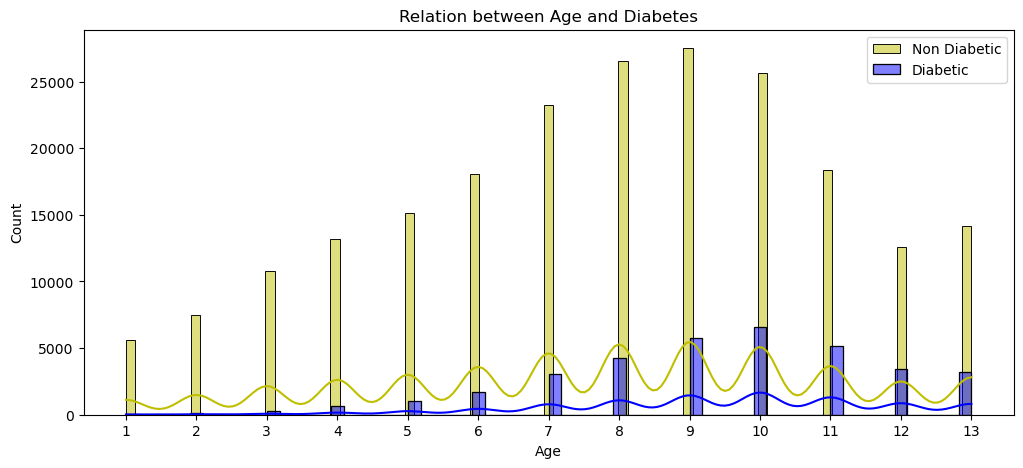

In [56]:
plt.figure(figsize=(12, 5))
sns.histplot(data.Age[data.Diabetes_binary == 0], color="y", label="Non Diabetic" , kde = True )
sns.histplot(data.Age[data.Diabetes_binary == 1], color="b", label="Diabetic" , kde = True )
plt.title("Relation between Age and Diabetes")

plt.xticks(data["Age"].unique())
plt.legend()

In [60]:
ax= px.treemap(data,path=['BMI'],title="BMI counts")
ax.show()

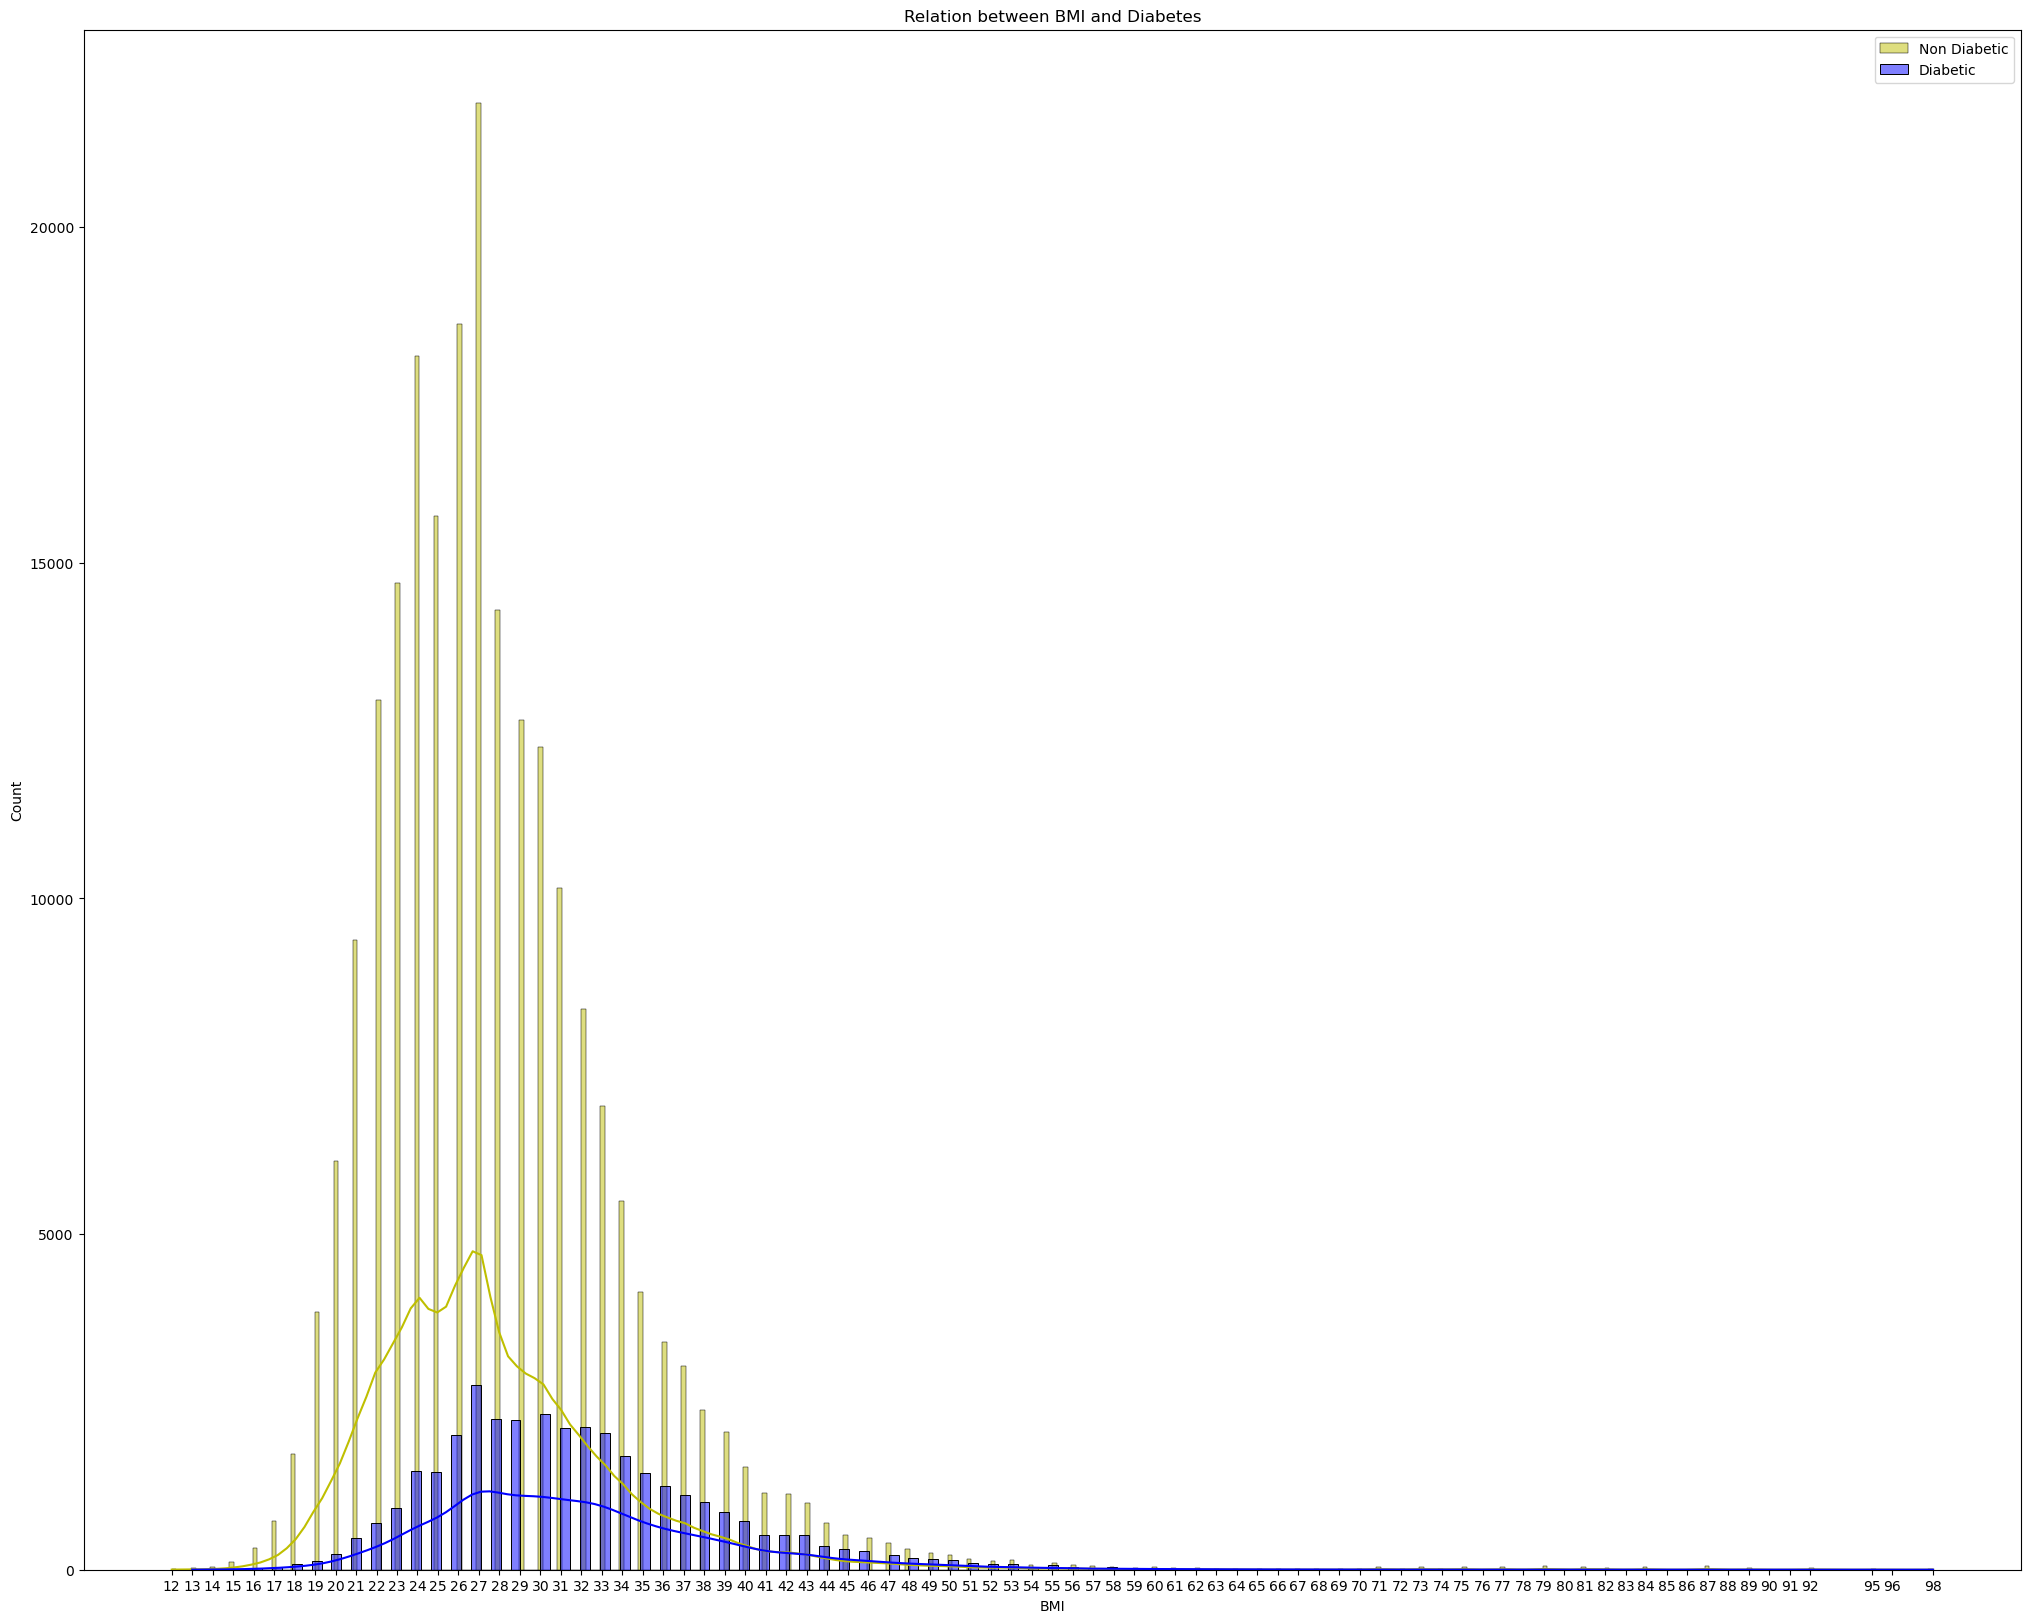

In [65]:
plt.figure(figsize=(25, 20))
sns.histplot(data.BMI[data.Diabetes_binary == 0], color="y", label="Non Diabetic" , kde = True )
sns.histplot(data.BMI[data.Diabetes_binary == 1], color="b", label="Diabetic" , kde = True )
plt.title("Relation between BMI and Diabetes")

plt.xticks(data["BMI"].unique())
plt.legend()

Text(0.5, 1.0, 'Relation of smoking and alcohol consumption to Diabetes')

<Figure size 1200x500 with 0 Axes>

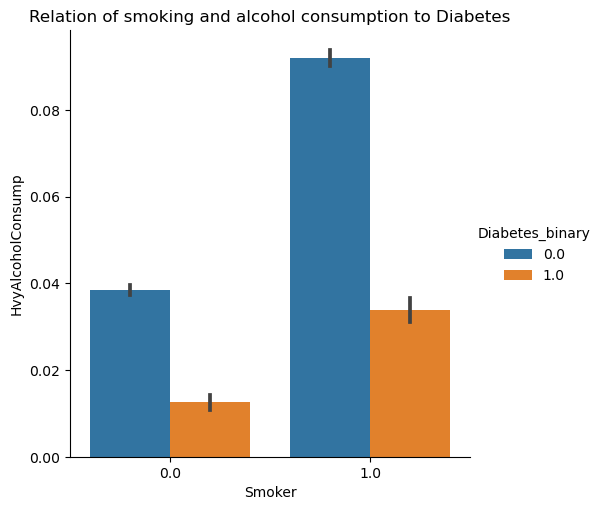

In [59]:
plt.figure(figsize=(12,5))
sns.catplot(x ='Smoker', y = 'HvyAlcoholConsump', data = data_cp, hue='Diabetes_binary', kind='bar');  
plt.title("Relation of smoking and alcohol consumption to Diabetes")

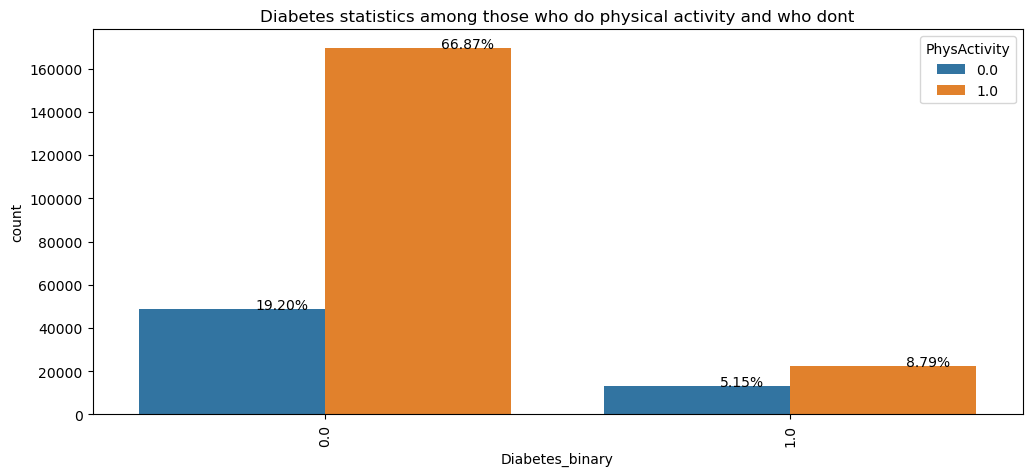

In [58]:
plt.figure(figsize=(12,5))
x= sns.countplot(x='Diabetes_binary',data=data_cp,hue='PhysActivity')
plt.xticks(rotation=90)
plt.title('Diabetes statistics among those who do physical activity and who dont')
for i in x.patches:
    x.annotate('{:.2f}'.format((i.get_height()/data_cp.shape[0])*100)+'%',(i.get_x()+0.25, i.get_height()+0.01))
plt.show()

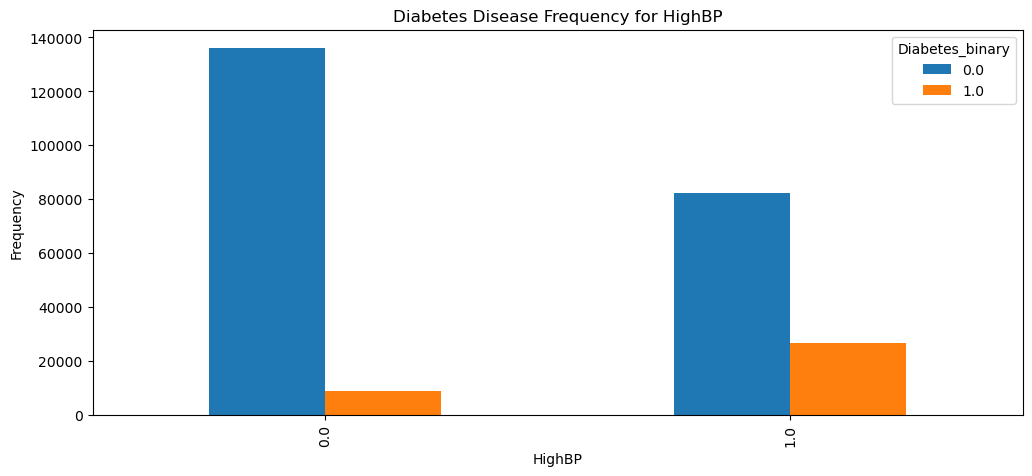

In [57]:
pd.crosstab(data['HighBP'],data['Diabetes_binary']).plot(kind="bar",figsize=(12,5))

plt.title('Diabetes Disease Frequency for HighBP')
plt.xlabel("HighBP")
plt.ylabel('Frequency')
plt.show()


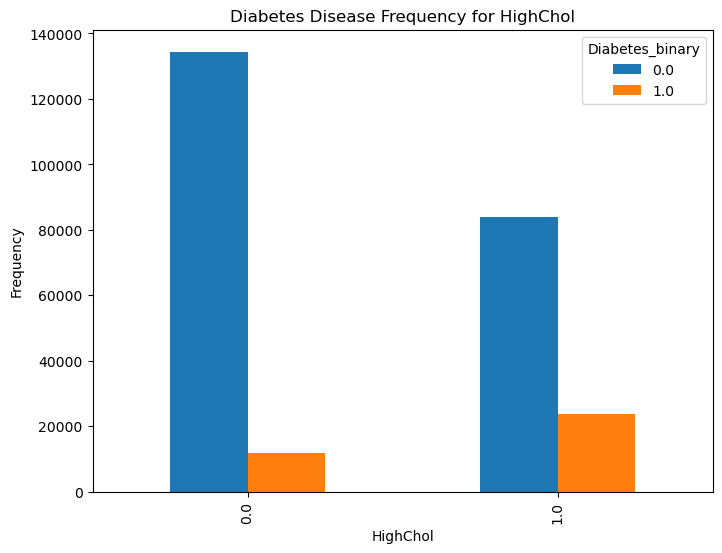

In [68]:
    pd.crosstab(
        data_cp.HighChol,
        data_cp.Diabetes_binary).plot(
        kind="bar",
        figsize=(
            8,
             6))
    plt.title('Diabetes Disease Frequency for HighChol')
    plt.xlabel("HighChol")
    plt.ylabel('Frequency')
    plt.show()

In [66]:
#Checking for null values
dataset = data.copy()



SyntaxError: invalid syntax (420380733.py, line 9)

## Missing data approach

In [17]:
#In case of missing data
#from sklearn.preprocessing import Imputer
#imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
#imp.fit(df) 

## Encoding Categorical data

In [18]:
#In case of categorical data
#from sklearn.preprocessing import LabelEncoder,OneHotEncoder
#label_encoder =LabelEncoder()
#OHE = OneHotEncoder() Understand both the concept properly

## Checking for Duplicates

In [19]:
#Summing up the count of duplicate data
dataset.duplicated().sum()

24206

## Cleaning Duplicates

In [20]:
#Drop all duplicates
dataset.drop_duplicates(inplace=True)

## Checking for outliers

In [21]:
#Checking for outliers using isolation forest
from sklearn.ensemble import IsolationForest
outliers = IsolationForest()
outliers.fit(dataset)
#Creating a new column to identify outliers
dataset['outlier'] = outliers.predict(dataset)

## Cleaning Outliers for a better fit

In [140]:
#Checking the anamolies
dataset.drop(dataset[dataset['outlier']==-1].index,inplace = True)
#Dropping the outliers column after cleaning outliers
dataset.drop(columns=['outlier'], inplace=True)

In [22]:
dataset.head()
dataset.to_numpy()

array([[ 0.,  1.,  1., ...,  4.,  3., -1.],
       [ 0.,  0.,  0., ...,  6.,  1., -1.],
       [ 0.,  1.,  1., ...,  4.,  8., -1.],
       ...,
       [ 0.,  0.,  0., ...,  5.,  2.,  1.],
       [ 0.,  1.,  0., ...,  5.,  1.,  1.],
       [ 1.,  1.,  1., ...,  6.,  2., -1.]])

## Splitting the features and values seperately/ dataset into training and validation

In [23]:
y_diabetes = dataset['Diabetes_binary'].values
X = dataset.drop(['Diabetes_binary'], axis=1)

X = X.values

#Splitting dataset into test and training sets
from sklearn.model_selection import train_test_split
X_train_org, X_test, y_train_org, y_test = train_test_split(X, y_diabetes, test_size = 0.30, random_state = 44, stratify = y_diabetes) 

In [24]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='not majority')
X_train, y_train= smote.fit_resample(X_train_org, y_train_org)

from collections import Counter
print('Resampled dataset shape %s' % Counter(y_train))

Resampled dataset shape Counter({1.0: 136063, 0.0: 136063})


## Feature Scaling

In [25]:
#Feature scaling using standard scaler(use for Unifromity )
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Decision Tree Classifier

In [26]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_features=11, max_depth=15)
#Fitting data #Predicting on test set
dtc.fit(X_train,y_train)
#Predicting on test set
y_pred_diabetes_dtc = dtc.predict(X_test)

### Providing Metrics

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_diabetes_dtc))


              precision    recall  f1-score   support

         0.0       0.91      0.89      0.90     58314
         1.0       0.45      0.52      0.48     10529

    accuracy                           0.83     68843
   macro avg       0.68      0.70      0.69     68843
weighted avg       0.84      0.83      0.83     68843



## K Nearest neighbours classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
#Fitting data #Predicting on test set
knn.fit(X_train, y_train)
#Predicting on test set
y_pred_diabetes_knn = knn.predict(X_test)

C:\Users\varun.bhoj\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



### Providing Metrics

In [53]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_diabetes_knn))

              precision    recall  f1-score   support

         0.0       0.94      0.80      0.87     58314
         1.0       0.40      0.72      0.51     10529

    accuracy                           0.79     68843
   macro avg       0.67      0.76      0.69     68843
weighted avg       0.86      0.79      0.81     68843



## Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=115, max_features=10 , max_depth=10)
#Fitting data
rfc.fit(X_train,y_train)
#Predicting on test set
y_pred_diabetes_rfc = rfc.predict(X_test)
#Understanding all the model wrt to the given data, and which works the best in accordance

### Providing Metrics

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_diabetes_rfc))

              precision    recall  f1-score   support

         0.0       0.93      0.87      0.90     58314
         1.0       0.46      0.61      0.52     10529

    accuracy                           0.83     68843
   macro avg       0.69      0.74      0.71     68843
weighted avg       0.85      0.83      0.84     68843



## XGBoost Classifier

In [30]:
from xgboost import XGBClassifier
xgbc= XGBClassifier(max_depth=15)
#Fitting data 
xgbc.fit(X_train, y_train)
#Predicting on test set
y_pred_diabetes_xgb = xgbc.predict(X_test)

###  Providing Metrics

In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_diabetes_xgb))

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92     58314
         1.0       0.61      0.40      0.48     10529

    accuracy                           0.87     68843
   macro avg       0.75      0.67      0.70     68843
weighted avg       0.85      0.87      0.86     68843



## Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
#Fitting data
lr.fit(X_train, y_train)
#Predicting on test set
y_pred_diabetes_lr = lr.predict(X_test)

### Providing Metrics

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_diabetes_lr))

              precision    recall  f1-score   support

         0.0       0.95      0.78      0.85     58314
         1.0       0.38      0.76      0.51     10529

    accuracy                           0.78     68843
   macro avg       0.67      0.77      0.68     68843
weighted avg       0.86      0.78      0.80     68843

